In [ ]:
import numpy as np
arr=[10,2,3,45,3,5]
arr=np.array(arr).reshape(2,3)
arr1=np.array(arr,dtype=complex)
print(arr1)
print(arr1.dtype)
arr=np.array(arr).reshape((2,3))
print(arr)
print(arr.max(axis=0))

[[10.+0.j  2.+0.j  3.+0.j]
 [45.+0.j  3.+0.j  5.+0.j]]
complex128
[[10  2  3]
 [45  3  5]]
[45  3  5]


In [ ]:

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
# load the model
model = VGG16()
# load an image from file
image = load_img('mug.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# predict the probability across all output classes
yhat = model.predict(image)
print(type(yhat))
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

<class 'numpy.ndarray'>
coffee_mug (75.27%)


In [ ]:
!pip3 install mtcnn

    100% |████████████████████████████████| 2.3MB 9.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/be/dd/12/bccde6b95f576af24256f6f1a2e4087eb8488405a6c107e13c
Successfully built mtcnn


In [ ]:
from mtcnn.mtcnn import MTCNN
import cv2

img = cv2.imread("face.jpg")
detector = MTCNN()
print(detector.detect_faces(img))blob:https://colab.research.google.com/d03aa04c-af76-448b-8cd4-40ac658aeab5

[{'box': [43, 55, 115, 153], 'confidence': 0.9999344348907471, 'keypoints': {'left_eye': (75, 116), 'right_eye': (130, 114), 'nose': (102, 149), 'mouth_left': (81, 176), 'mouth_right': (127, 175)}}]


In [ ]:

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
# load the model
model = VGG16()
# load an image from file
image = load_img('mug.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

lab_coat (71.85%)


24
[{'box': [454, 195, 160, 197], 'confidence': 0.9999555349349976, 'keypoints': {'left_eye': (520, 263), 'right_eye': (592, 272), 'nose': (565, 299), 'mouth_left': (519, 342), 'mouth_right': (578, 351)}}]
1
Successfully Processed!


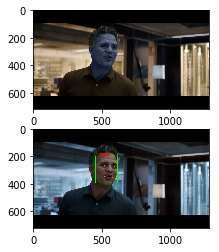

In [ ]:
import cv2
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from mtcnn.mtcnn import MTCNN
import numpy as np


def detect_f(ig):
  
  detector = MTCNN()
  imageo = cv2.imread(ig)
  result = detector.detect_faces(imageo)
  print(result)
  image_new=imageo.copy()
  # plt.imshow(image_new)
  print(len(result))
  index=len(result)
  if(index==0):
    print("No face detected")
    return;
  f, ax1=plt.subplots(2,1)

  for i in range(0,index):
    bounding_box = result[i]['box']
    keypoints = result[i]['keypoints']
    cv2.rectangle(imageo,(bounding_box[0],bounding_box[1]),(bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),(0,255,0),3)
    cv2.circle(imageo,(keypoints['left_eye']), 2, (0,155,255), 2)
    cv2.circle(imageo,(keypoints['right_eye']), 2, (0,155,255), 2)
    cv2.circle(imageo,(keypoints['nose']), 2, (0,155,255), 2)
    cv2.circle(imageo,(keypoints['mouth_left']), 2, (0,155,255), 2)
    cv2.circle(imageo,(keypoints['mouth_right']), 2, (0,155,255), 2)
    font = cv2.FONT_HERSHEY_DUPLEX 
    confidence=result[i]['confidence']
    cv2.putText(imageo, str(confidence)[0:7], (bounding_box[0],bounding_box[1]), font,0.75, (0, 0,255),2)
    cv2.imwrite("Final_image.jpg", imageo)
    img=mpimg.imread('Final_image.jpg')


  ax1[0].imshow(image_new)
  ax1[1].imshow(img)
  
  
  
vidcap = cv2.VideoCapture('video.mp4')
count = 0
success = True
fps = int(vidcap.get(cv2.CAP_PROP_FPS))
print(fps)
while success:
    success,image = vidcap.read()
#     print('read a new frame:',success)
    if(count==600):
#       cv2.imwrite("frame%d.jpg" % count, image)
      cv2.imwrite("frameNew.jpg", image)
      detect_f("frameNew.jpg")
      break;
    
#     if count%(10*fps) == 0 :
#          cv2.imwrite('frame%d.jpg'%count,image)
#          print('successfully written 10th frame')
#     count+=1
#     cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file
#     cv2.waitKey(2)
    count += 1
  
print("Successfully Processed!")